<a href="https://colab.research.google.com/github/hezzie95/Data-analysis/blob/master/%EA%B3%A0%EA%B0%9D_%EC%84%B8%EA%B7%B8%EB%A8%BC%ED%8A%B8_%EB%B6%84%EB%A5%98%EC%99%80_%ED%83%80%EA%B2%9F%ED%8C%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##데이터 설명

###데이터 출처: https://www.kaggle.com/loveall/clicks-conversion-tracking
---
* **ad_id**: 개별 광고에 부여된 고유 아이디
* **xyzcampaignid**: 'XYZ 회사'가 광고 캠페인에 부여한 아이디.
* **fbcampaignid**: 페이스북 캠페인 추적 아이디
* **age**: 해당 광고에 노축된 고객 나이
* **gender**: 해당 광고에 노출된 고객들의 성별
* **interest**: 고객 페이스북 공개 프로필에 기재된 흥미 분류
* **Impressions**: 광고 재생 시간
* **Clicks**: 해당 광고를 클릭한 수
* **Spent**: xyz회사가 페이스 북에 그 광고를 띄우기 위해 쓴 비용
* **Total conversion**: 광고를 본 후에 제품을 문의한 사람의 수 
* **Approved conversion**: 광고를 본후 제품을 구매한 사람의 수
---


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KAG_conversion_data.csv to KAG_conversion_data (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("KAG_conversion_data.csv")

In [ ]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


#1.문제 정의
* 어떤 고객을 타겟으로 삼아야 전환수가 늘어날까??

#2. 분석 과정

문제에 대한 해답을 도출하기 위해 비지도학습을 활용한 군집화를 하였습니다.</br>








**프로세스**

1단계: EDA를 통해 캠페인 관련 지표들의 상관관계를 알아본다.</br>
2단계: 캠페인 지표를 토대로 'K-means를 활용한 군집화'를 진행하여, 고객 세그먼트를 나눈다.</br>
3단계: 세그먼트 내 타겟군을 설정하고 그 특성을 살펴본다.



###(1) EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [ ]:
df.shape

(1143, 11)

In [ ]:
df['ad_id'].nunique()

1143

In [ ]:
df["xyz_campaign_id"].nunique()

3

In [ ]:
df['fb_campaign_id'].nunique()

691

**결측값**은 없으며, </br>ad_id의 **고유값**은 1143개, xyz_campaign_id는 3개, fb_campaign_id는 691개입니다.

In [ ]:
df[['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion']].describe()

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,3.052003e+06,421.000000,639.949998,60.000000,21.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7f6c3e2e01d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6c3da1d950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6c3da80e10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6c3da24450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6c3da12e90>,
  <matplotlib.lines.Line2D at 0x7f6c3da1d410>]}

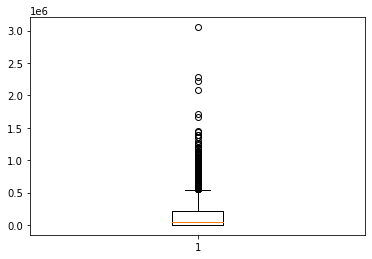

In [ ]:
plt.boxplot(df['Impressions'])

Impressions /	Clicks /	Spent	/ Total_Conversion /	Approved_Conversion 모두 정상적 범주를 벗어나는 큰 값들이 존재합니다. </br>
그렇다면 이 값들이 단순한 outlier인지, 일종의 상관관계를 가지고 있는지 알아보기 위해 heatmap을 사용해보겠습니다.</br>

범주형인 ID와 gender 데이터는 제하고 살펴보겠습니다.</br>interest는 어떤 기준으로 분류되었는지 알 수 없으므로 우선은 heatmap에 넣어보겠습니다.

In [ ]:
df['age'].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [ ]:
age_mapping={'30-34':0,'35-39':1,'40-44':3, '45-49':4}
df['age_mapping']=df["age"].map(age_mapping)

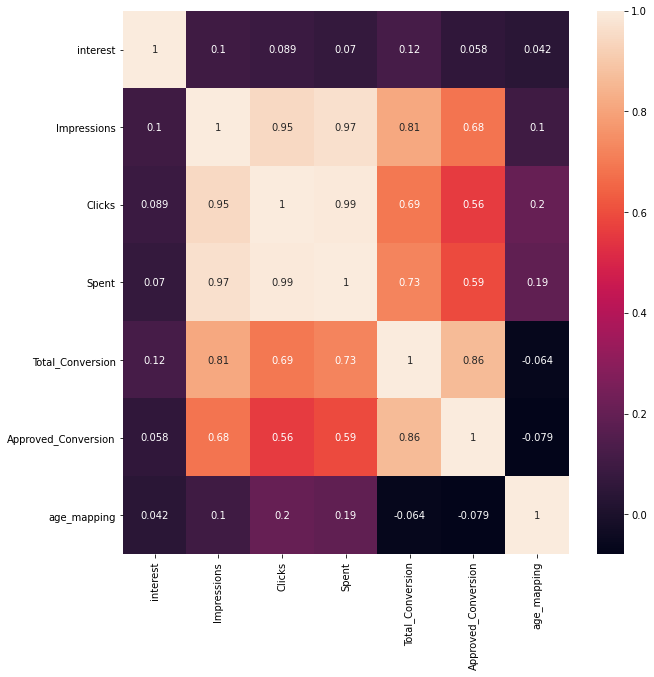

In [ ]:
plt.figure(figsize=(10,10))
corr=df.drop(["ad_id","xyz_campaign_id","fb_campaign_id"],axis=1).corr()
sns.heatmap(corr,annot=True)

Impressions / Clicks / Spent Total_Conversion / Approved_Conversion 사이에 상관관계가 존재하고</br> age와 interest는 다른 변수들과 큰 상관관계가 없습니다.</br>




pairplot을 이용해, 상관관계가 있는 변수들 간의 관계를 시각화해 보겠습니다.

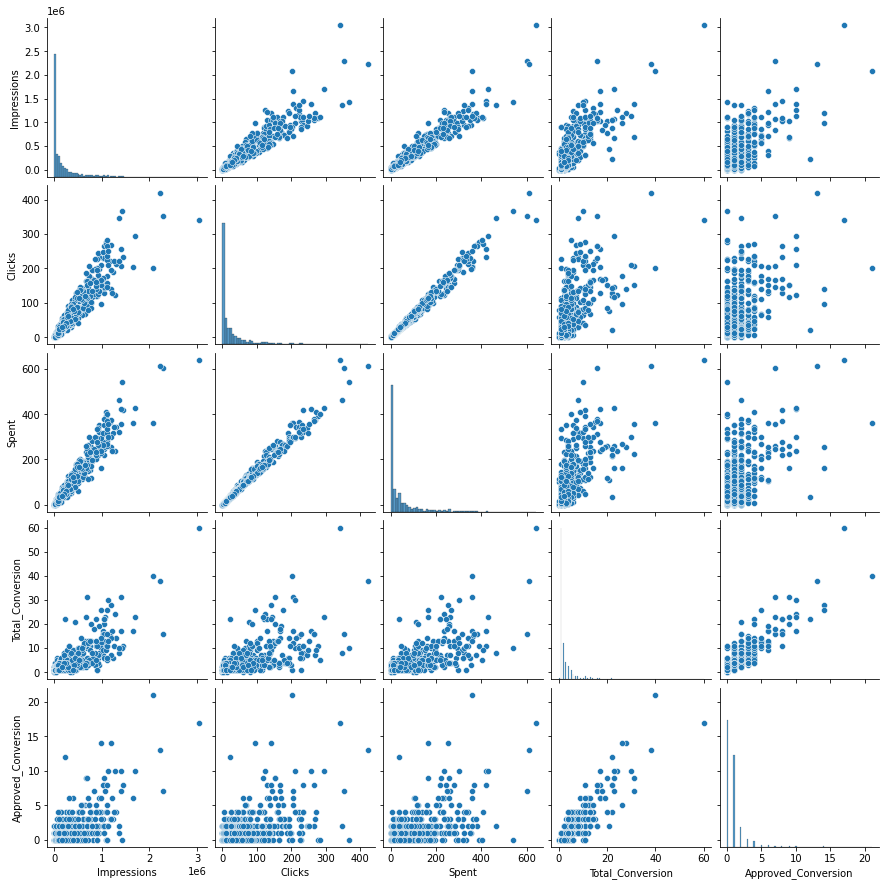

In [ ]:
sns.pairplot(df.drop(["ad_id","xyz_campaign_id","fb_campaign_id",'age_mapping','interest'],axis=1))
plt.show()

* **Clicks**와 **Spent**는 *'선명한 양의 상관관계'* 를 띕니다 
* **Impressions**는 **Clicks/Spent**와 *'양의 상관관계'* 를 띕니다.
* **Total_Conversion**은 **Clicks/Spent**와 *'불분명한 양의 상관관계'* 를 띕니다.</br>**Total_Conversion**은 **Impressions**와 *'양의 상관관계'* 를 띕니다.
* **Aprroved Conversion**은 **Total_Conversion**와 *'양의 상관관계'* 를 가지고 있습니다.</br>**Aprroved Conversion**은 **Impression/Clicks/Spent**과는 *'불분명한 양의 상관관계'*를 띕니다.

#####캠페인별 특징 시각화#####

In [ ]:
df["xyz_campaign_id"].value_counts()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

In [ ]:
xyz_916= df.loc[df["xyz_campaign_id"]==916]
xyz_936= df.loc[df["xyz_campaign_id"]==936]
xyz_1178= df.loc[df["xyz_campaign_id"]==1178]

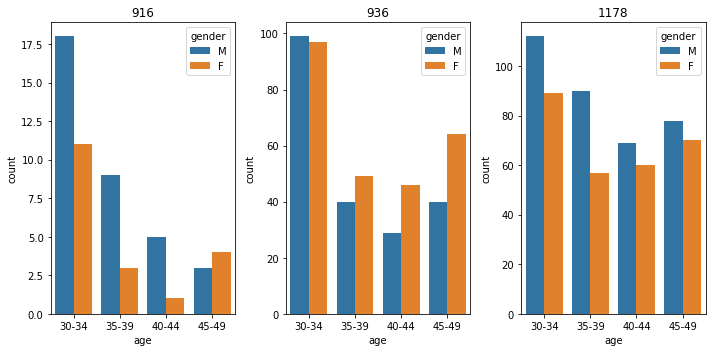

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
sns.countplot(data=xyz_916,x='age',hue='gender')
plt.title("916")

plt.subplot(1,3,2)
sns.countplot(data=xyz_936,x='age',hue='gender')
plt.title("936")

plt.subplot(1,3,3)
sns.countplot(data=xyz_1178,x='age',hue='gender')
plt.title("1178")
plt.tight_layout()


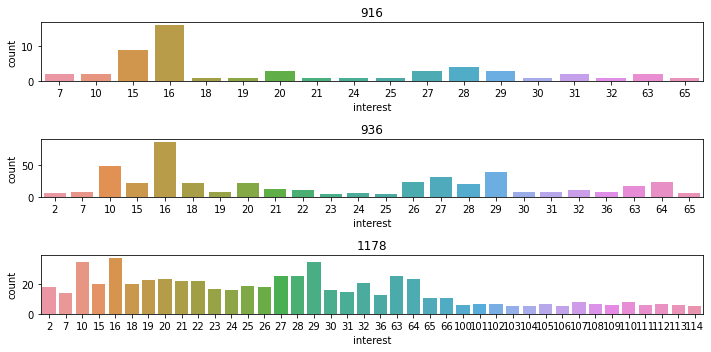

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(3,1,1)
sns.countplot(data=xyz_916,x='interest')
plt.title("916")

plt.subplot(3,1,2)
sns.countplot(data=xyz_936,x='interest')
plt.title("936")

plt.subplot(3,1,3)
sns.countplot(data=xyz_1178,x='interest')
plt.title("1178")

plt.tight_layout()

**캠페인 대상**

* **916**: 30대 초중반 /남성 /관심사 - 15,16 
* **936**: 30대 초중반 /여성 약간 우세 /관심사 - 주로 10,16이지만 15,20,26,27,28,29도 해당   
* **1178:** 모든 연령층 /남성 약간 우세 /관심사 - 2~66까지 다양하게 분포

이번에는 캠페인별 성과를 비교해보겠습니다.

<BarContainer object of 1143 artists>

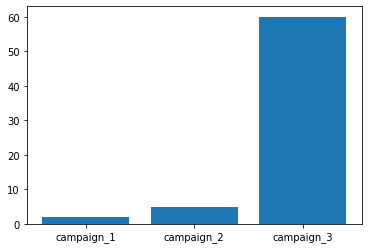

In [ ]:
df['xyz_campaign_id']=df["xyz_campaign_id"].replace({916:"campaign_1",936:"campaign_2",1178:"campaign_3"})

plt.bar(df["xyz_campaign_id"],df["Total_Conversion"])

<BarContainer object of 1143 artists>

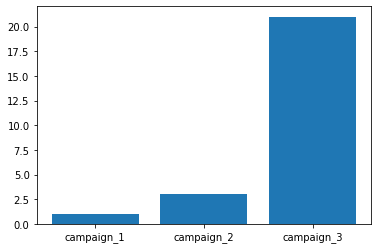

In [ ]:
plt.bar(df["xyz_campaign_id"],df["Approved_Conversion"])

대부분의 문의와 구매가 1178 캠페인에서 일어난 것을 알 수 있습니다.</br>
우선은 **모든 연령층 /남성 약간 우세 /관심사 - 2~66까지 다양하게 분포**이 타겟 대상으로 고려해볼 수 있겠군요.

그렇다면 이제 좀 더 디테일하게 해당 제품이 구체적으로 어떤 세그먼트를 타겟으로 해야하는 지 살펴보겠습니다. 

## (2) K-means를 활용한 고객 세그먼트 나누기

In [ ]:
segment = df.groupby('fb_campaign_id')[['Spent',"Clicks",'Impressions']].mean()

In [ ]:
segment.head()

,Spent,Clicks,Impressions
fb_campaign_id,,,
103916,1.43,1.0,7350.0
103917,1.82,2.0,17861.0
103920,0.00,0.0,693.0
103928,1.27,1.0,4196.0
103929,0.00,0.0,1915.0


비지도 학습을 실행하기 전, 표준화로 데이터 전처리를 해주겠습니다.

In [ ]:
data = segment.values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Standard=StandardScaler()
data = Standard.fit_transform(data)

세그먼트를 분류해보겠습니다.

In [ ]:
from sklearn.cluster import KMeans

k: 1 | cost: 2073.0
k: 2 | cost: 582.3089897180614
k: 3 | cost: 279.1833032958179
k: 4 | cost: 178.929020620015
k: 5 | cost: 127.62606410816828


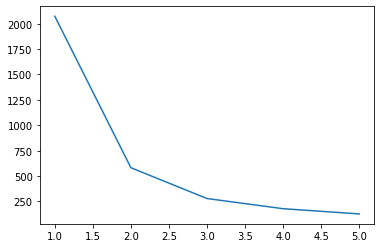

In [ ]:
X=data

k_list=[]
cost_list=[]
for k in range(1,6):
  kmeans = KMeans(n_clusters=k).fit(X)
  inertia=kmeans.inertia_
  print('k:',k,'| cost:',inertia)
  k_list.append(k)
  cost_list.append(inertia)

plt.plot(k_list,cost_list)

2에서 한 번 꺾이고, 3과 4에서 또 한 번씩 꺾입니다.</br>
세밀한 군집화를 목적으로 하므로 2는 제외하고, 3과 4, 둘 중에 어떤 분류가 더 정확할지 실루엣 스코어로 검증해보겠습니다.

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score
from matplotlib import cm

In [ ]:
def plot_silhouette(X, num_cluesters):
    for n_clusters in num_cluesters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
    
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
    
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
    
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
    
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
    
        plt.show()

For n_clusters = 3 The average silhouette_score is : 0.760663012025198


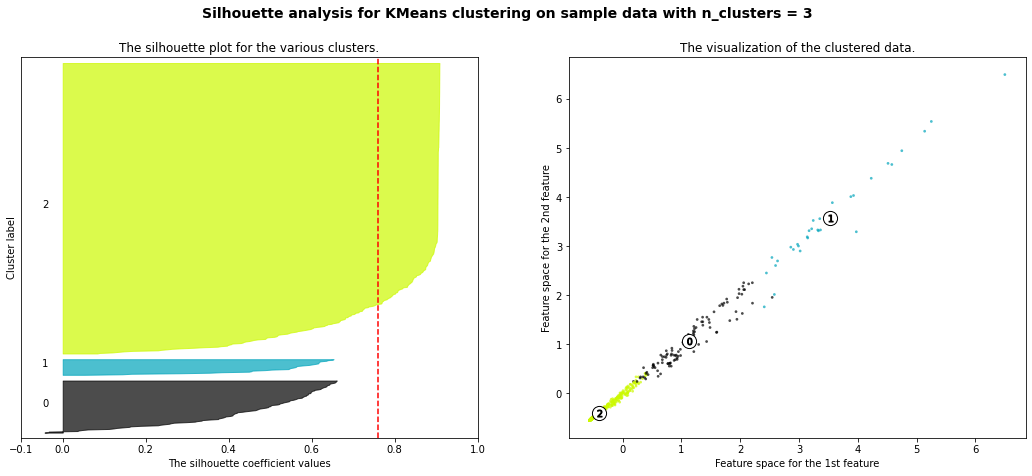

For n_clusters = 4 The average silhouette_score is : 0.7028895771355355


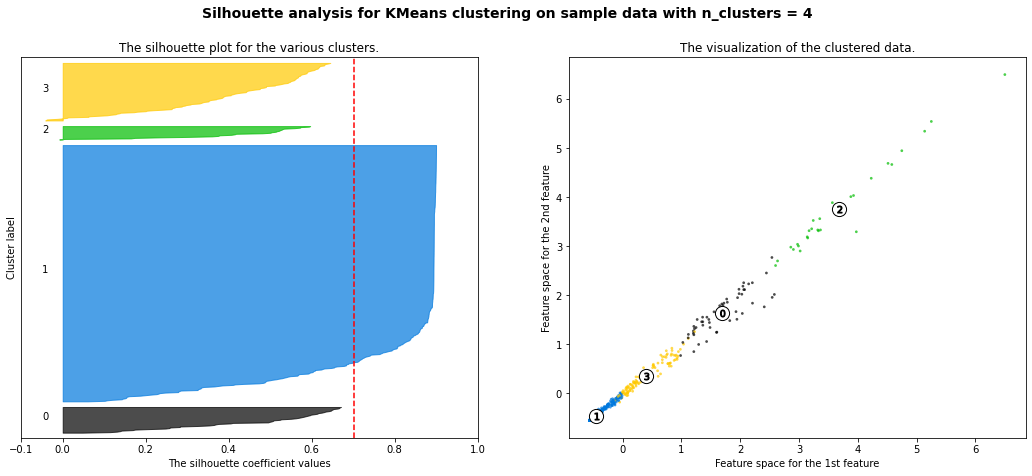

In [ ]:
plot_silhouette(data, [3,4])

cluster의 숫자가 3일 때의 실루엣스코어가 더 높으므로, 3개의 클러스터로 나누는 것으로 결정하겠습니다.


이제 세그먼트별 전환수를 확인해보고, 타겟으로 삼을 세그먼트의 특성을 살펴보겠습니다.

In [ ]:
kmeans=KMeans(n_clusters=3).fit(X)
cluster_num=kmeans.predict(X)
cluster=pd.Series(cluster_num)
segment['cluster_num']=cluster.values
segment.head()

,Spent,Clicks,Impressions,cluster_num
fb_campaign_id,,,,
103916,1.43,1.0,7350.0,0
103917,1.82,2.0,17861.0,0
103920,0.00,0.0,693.0,0
103928,1.27,1.0,4196.0,0
103929,0.00,0.0,1915.0,0


In [ ]:
segment_0=segment[segment['cluster_num']==0].index
segment_1=segment[segment['cluster_num']==1].index
segment_2=segment[segment['cluster_num']==2].index

In [ ]:
target_0=df[df['fb_campaign_id'].isin(segment_0)]
target_1=df[df['fb_campaign_id'].isin(segment_1)]
target_2=df[df['fb_campaign_id'].isin(segment_2)]

In [ ]:
print("target_0의 Total conversion :",target_0['Total_Conversion'].sum())
print("target_1의 Total conversion :",target_1['Total_Conversion'].sum())
print("target_2의 Total conversion :",target_2['Total_Conversion'].sum())

target_0의 Total conversion : 1149
target_1의 Total conversion : 681
target_2의 Total conversion : 1434


In [ ]:
print("target_0의 Approved conversion :",target_0['Approved_Conversion'].sum())
print("target_1의 Approved conversion :",target_1['Approved_Conversion'].sum())
print("target_2의 Approved conversion :",target_2['Approved_Conversion'].sum())

target_0의 Approved conversion : 398
target_1의 Approved conversion : 206
target_2의 Approved conversion : 475


cluster_num이 2인 고객이 타겟이 되겠네요.

cluster_num이 2인 고객의 특성을 시각화 해보겠습니다.

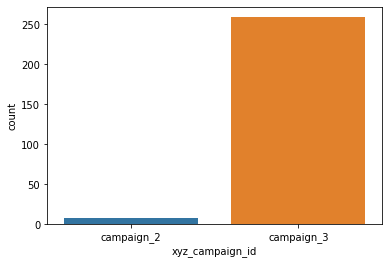

In [ ]:
sns.countplot(data=target_2,x='xyz_campaign_id')

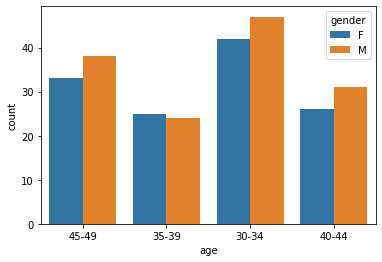

In [ ]:
sns.countplot(data=target_2,x='age',hue='gender')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


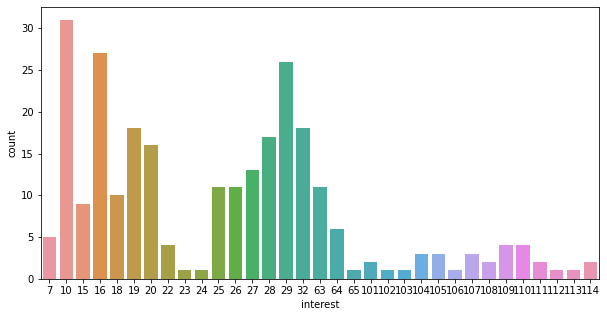

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(target_2['interest'])

#3. 결론

**타겟팅 대상**

* **나이**: 30대 초반
* **성별**: 여성 약간 우세
* **관심사**: 위의 그래프 참조



마지막으로 타겟팅 대상일 때와 아닐 때의 Approved_Conversion을 비교해보겠습니다.

In [ ]:
df_target=df.loc[df['gender']=="F"][df['interest']==10][df['age']=="30-34"]
df_target['Approved_Conversion'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


10

타겟팅 대상인 30대 초반, 여성, 관심사 10번에 해당하는 소비자군의 Approved_Conversion 합계는 10입니다.

In [ ]:
df_nontarget=df.loc[df['gender']=="M"][df['age']=="35-39"][df['interest']==113]
df_nontarget['Approved_Conversion'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1

타겟팅 대상이 아닌 30대 중후반, 남성, 관심사 113번에 해당하는 소비자군의 Approved_Conversion 합계는 1입니다.

따라서 타겟팅 대상을 위와 같은 소비자군으로 선정해야한다는 것이 결론입니다.